# TEDA-Ensemble

### *Main Differences:*
#### Unlike TEDA-RLS and TEDA-Forecasting, the TEDA-Ensemble algorithm is not designed for outlier processing; it is focused solely on forecasting. It is based on the Autocloud algorithm, which offers advantages such as simplicity and low computational effort. TEDA-Ensemble is an online algorithm that does not require offline training or prior data knowledge, making it a viable solution for the data stream and TinyML applications.

### Importing libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import statsmodels.api as sm
import padasip as pa

from sklearn.metrics import mean_squared_error, mean_absolute_error

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import datetime

import wandb
import logging
import os

from codecarbon import EmissionsTracker

c:\Users\Samsung\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Implemented modules and Padasip module

In [2]:
from padasip.filters.base_filter import AdaptiveFilter
from TedaEnsemble import DataCloud, TEDAEnsemble

from treating import dataTreating, dataSpliting, dataProcessing, dataSplit

### Data loading:

In [3]:
data = pd.read_csv("Electric_Production.csv")
data.rename(columns={'DATE':'Date', 'IPG2211A2N':'Production'}, inplace=True)
data.head()

#Variables
dataSeries = data["Production"]
date = "Date"

In [4]:
#data = pd.read_csv("multiTimeline.csv")
#data.head()

,Date,Interest
0,2019-08-04,0
1,2019-08-11,0
2,2019-08-18,0
3,2019-08-25,0
4,2019-09-01,0


### Visualization

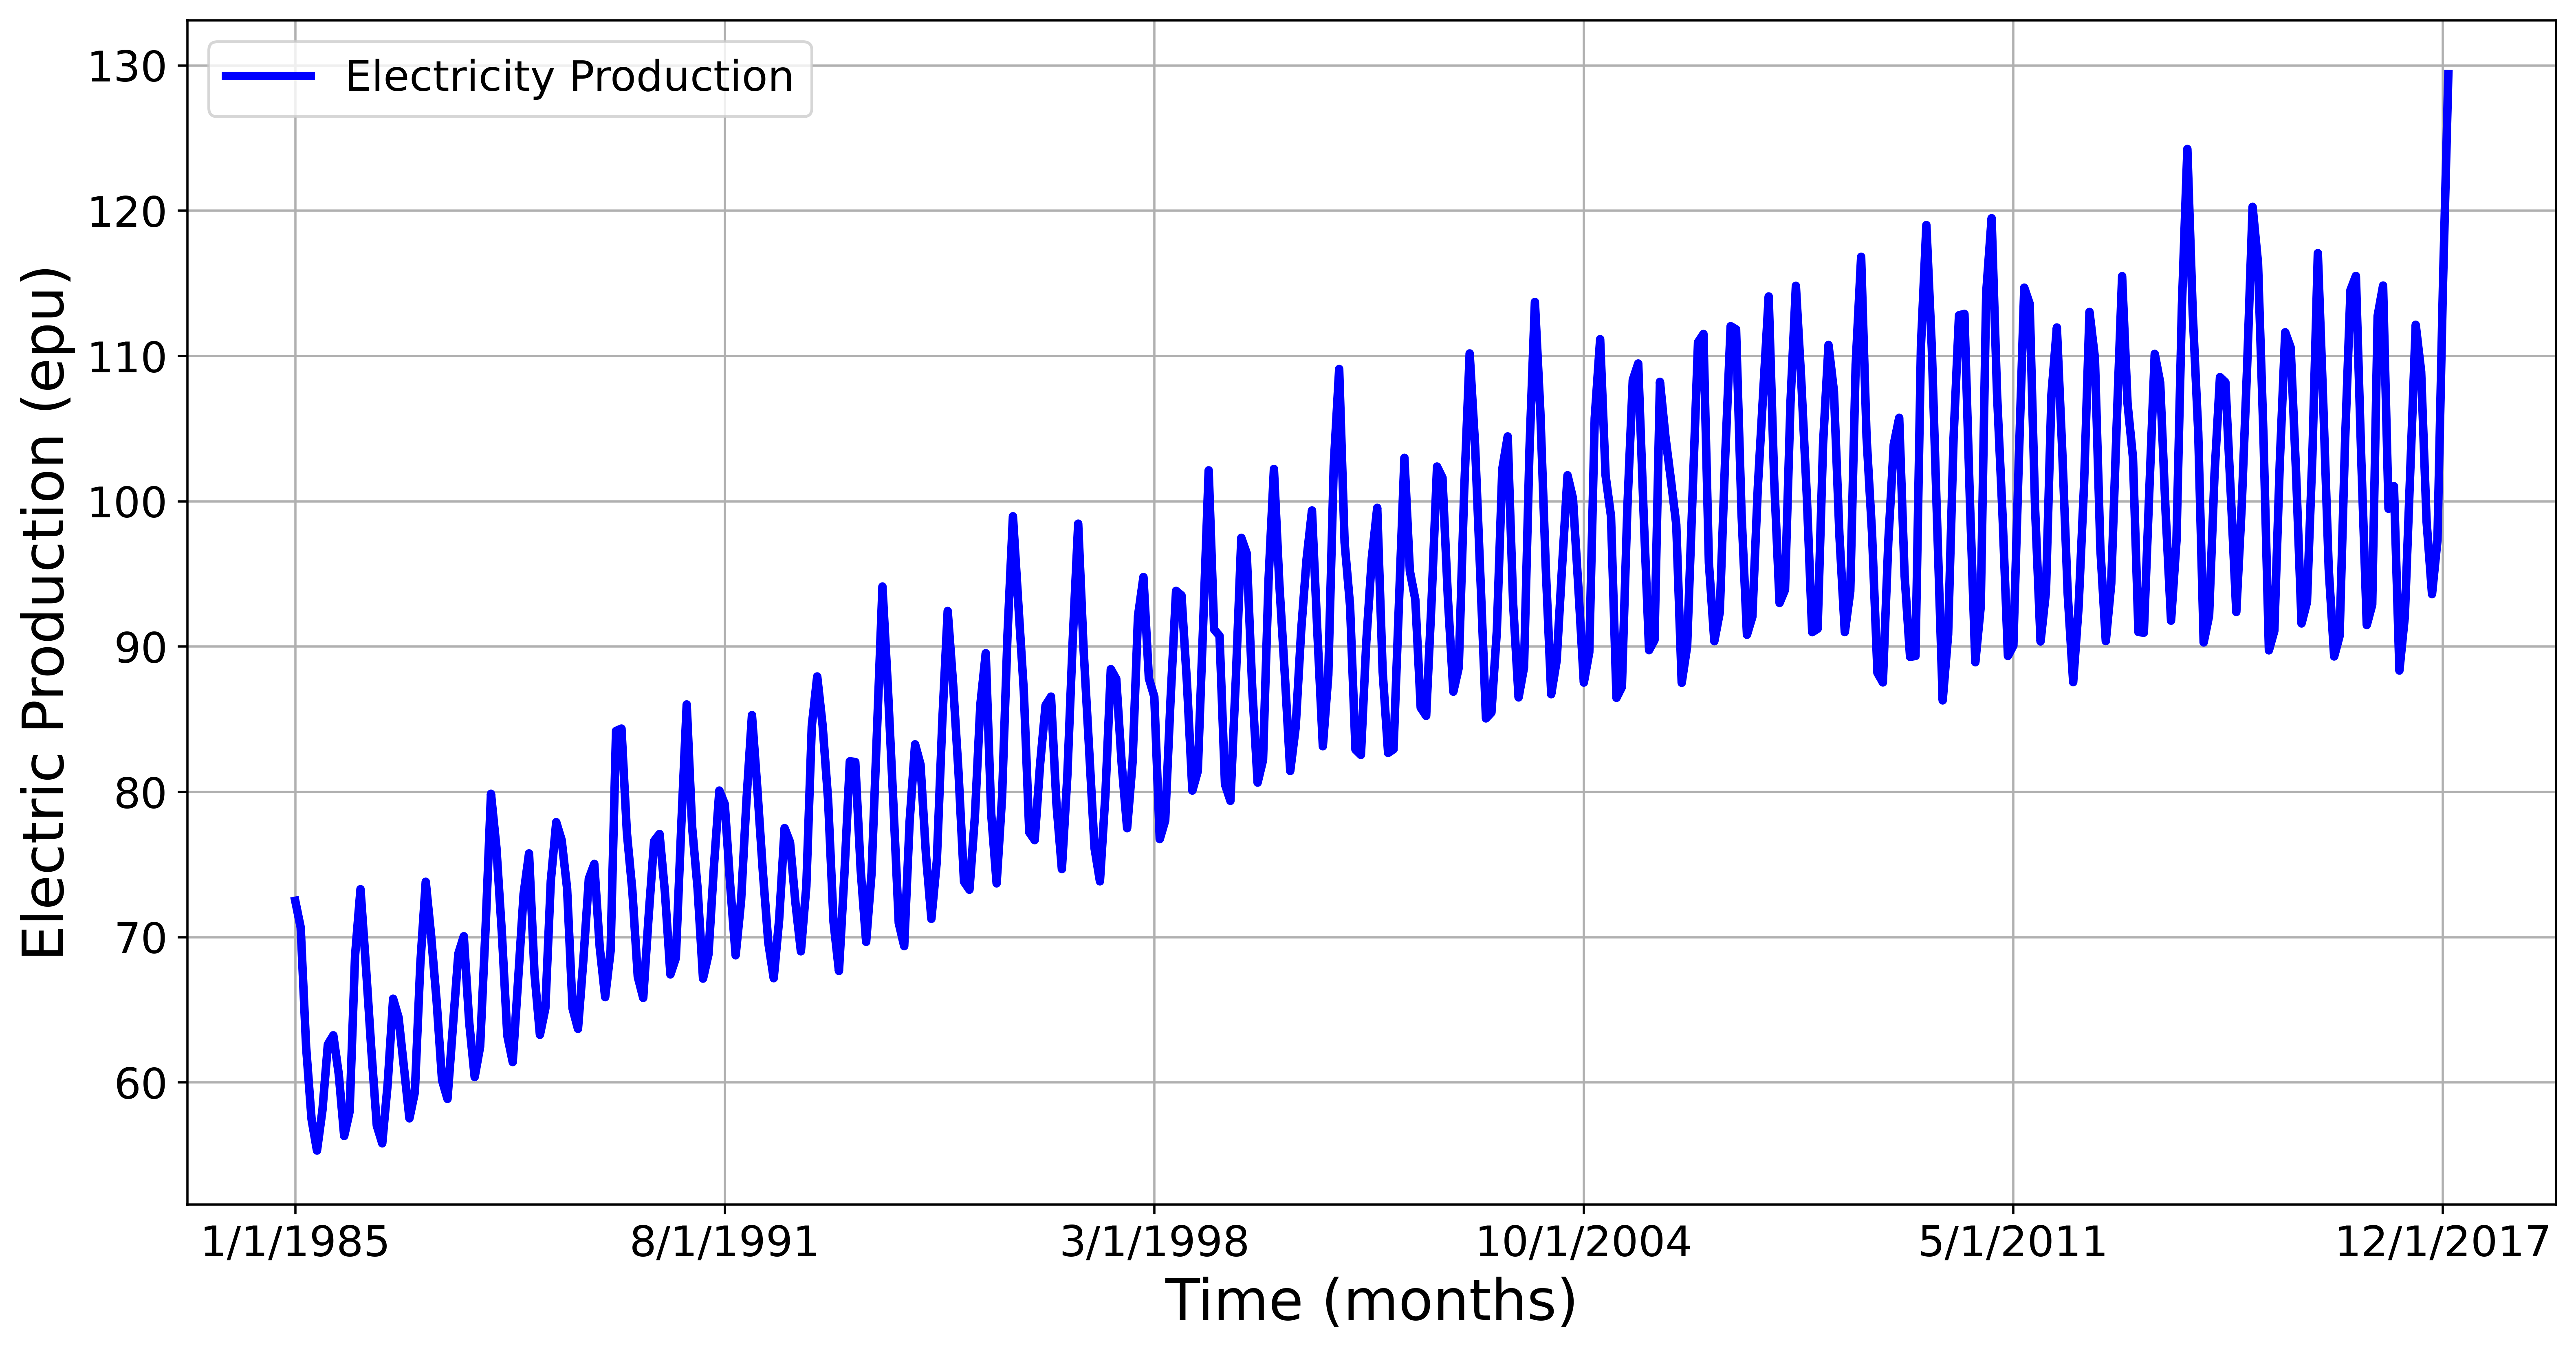

In [4]:
plt.figure(figsize=(15,7.7), dpi=500)
plt.xticks(fontsize=15)
plt.xticks(np.arange(0, len(data)+1, np.round(len(data)/5)))
plt.yticks(fontsize=15)
plt.grid()

plt.xlabel("Time (months)", fontsize=20)
plt.ylabel("Electric Production (epu)", fontsize=20)
plt.plot(data['Date'], data['Production'], 'b', label='Electricity Production', linewidth=3)
plt.legend(fontsize=15)

#plt.savefig('eletric_production_dataset.eps', format='eps', bbox_inches='tight')

In [5]:
#TEDA-Ensemble
RMSE_TEDA = []
RMSE_TEDA_CONS = []

#RMSE Individual
RMSE_TEDA_STACK = []
RMSE_TEDA_POND = []
RMSE_TEDA_MAJOR = []  

MAE_TEDA_STACK = []
MAE_TEDA_POND = []
MAE_TEDA_MAJOR = []

In [6]:
X_train, y_train, X_test, y_test = dataSpliting(pdSeries = dataSeries, window=2, N_splits = 5)
TEDAEnsemble_ = TEDAEnsemble(m=2, mu=0.99, threshold=2, activation_function="He")

for t in X_test:
    #TEDAEnsemble
    TEDAEnsemble_.run(np.array(t))


# TEDA Ensemble
rmse_TEDA_stack = mean_squared_error(y_test[1:-2], TEDAEnsemble.Ypred_STACK[:-1], squared=False)
rmse_TEDA_pond = mean_squared_error(y_test[1:-2], TEDAEnsemble.Ypred_POND[:-1], squared=False)
rmse_TEDA_major = mean_squared_error(y_test[1:-2], TEDAEnsemble.Ypred_MAJOR[:-1], squared=False)
RMSE_TEDA_STACK.append(rmse_TEDA_stack)
RMSE_TEDA_POND.append(rmse_TEDA_pond)
RMSE_TEDA_MAJOR.append(rmse_TEDA_major)


mae_TEDA_stack = mean_squared_error(y_test[1:-2], TEDAEnsemble.Ypred_STACK[:-1])
mae_TEDA_pond = mean_squared_error(y_test[1:-2], TEDAEnsemble.Ypred_POND[:-1])
mae_TEDA_major = mean_squared_error(y_test[1:-2], TEDAEnsemble.Ypred_MAJOR[:-1])
MAE_TEDA_STACK.append(mae_TEDA_stack)
MAE_TEDA_POND.append(mae_TEDA_pond)
MAE_TEDA_MAJOR.append(mae_TEDA_major)

Visualization:

In [7]:
figure2 = make_subplots(specs=[[{"secondary_y": True}]])

figure2.add_trace(
    go.Scatter(y=y_test[1:-2], name='True'),
    secondary_y=False
)

figure2.add_trace(
    go.Scatter(y=TEDAEnsemble.Ypred_STACK[:-1], name='RLS'),
    secondary_y=False
)

figure2.update_layout(
    title="Comparison "
)

figure2.update_xaxes(title='Time (seconds)')

figure2.show()

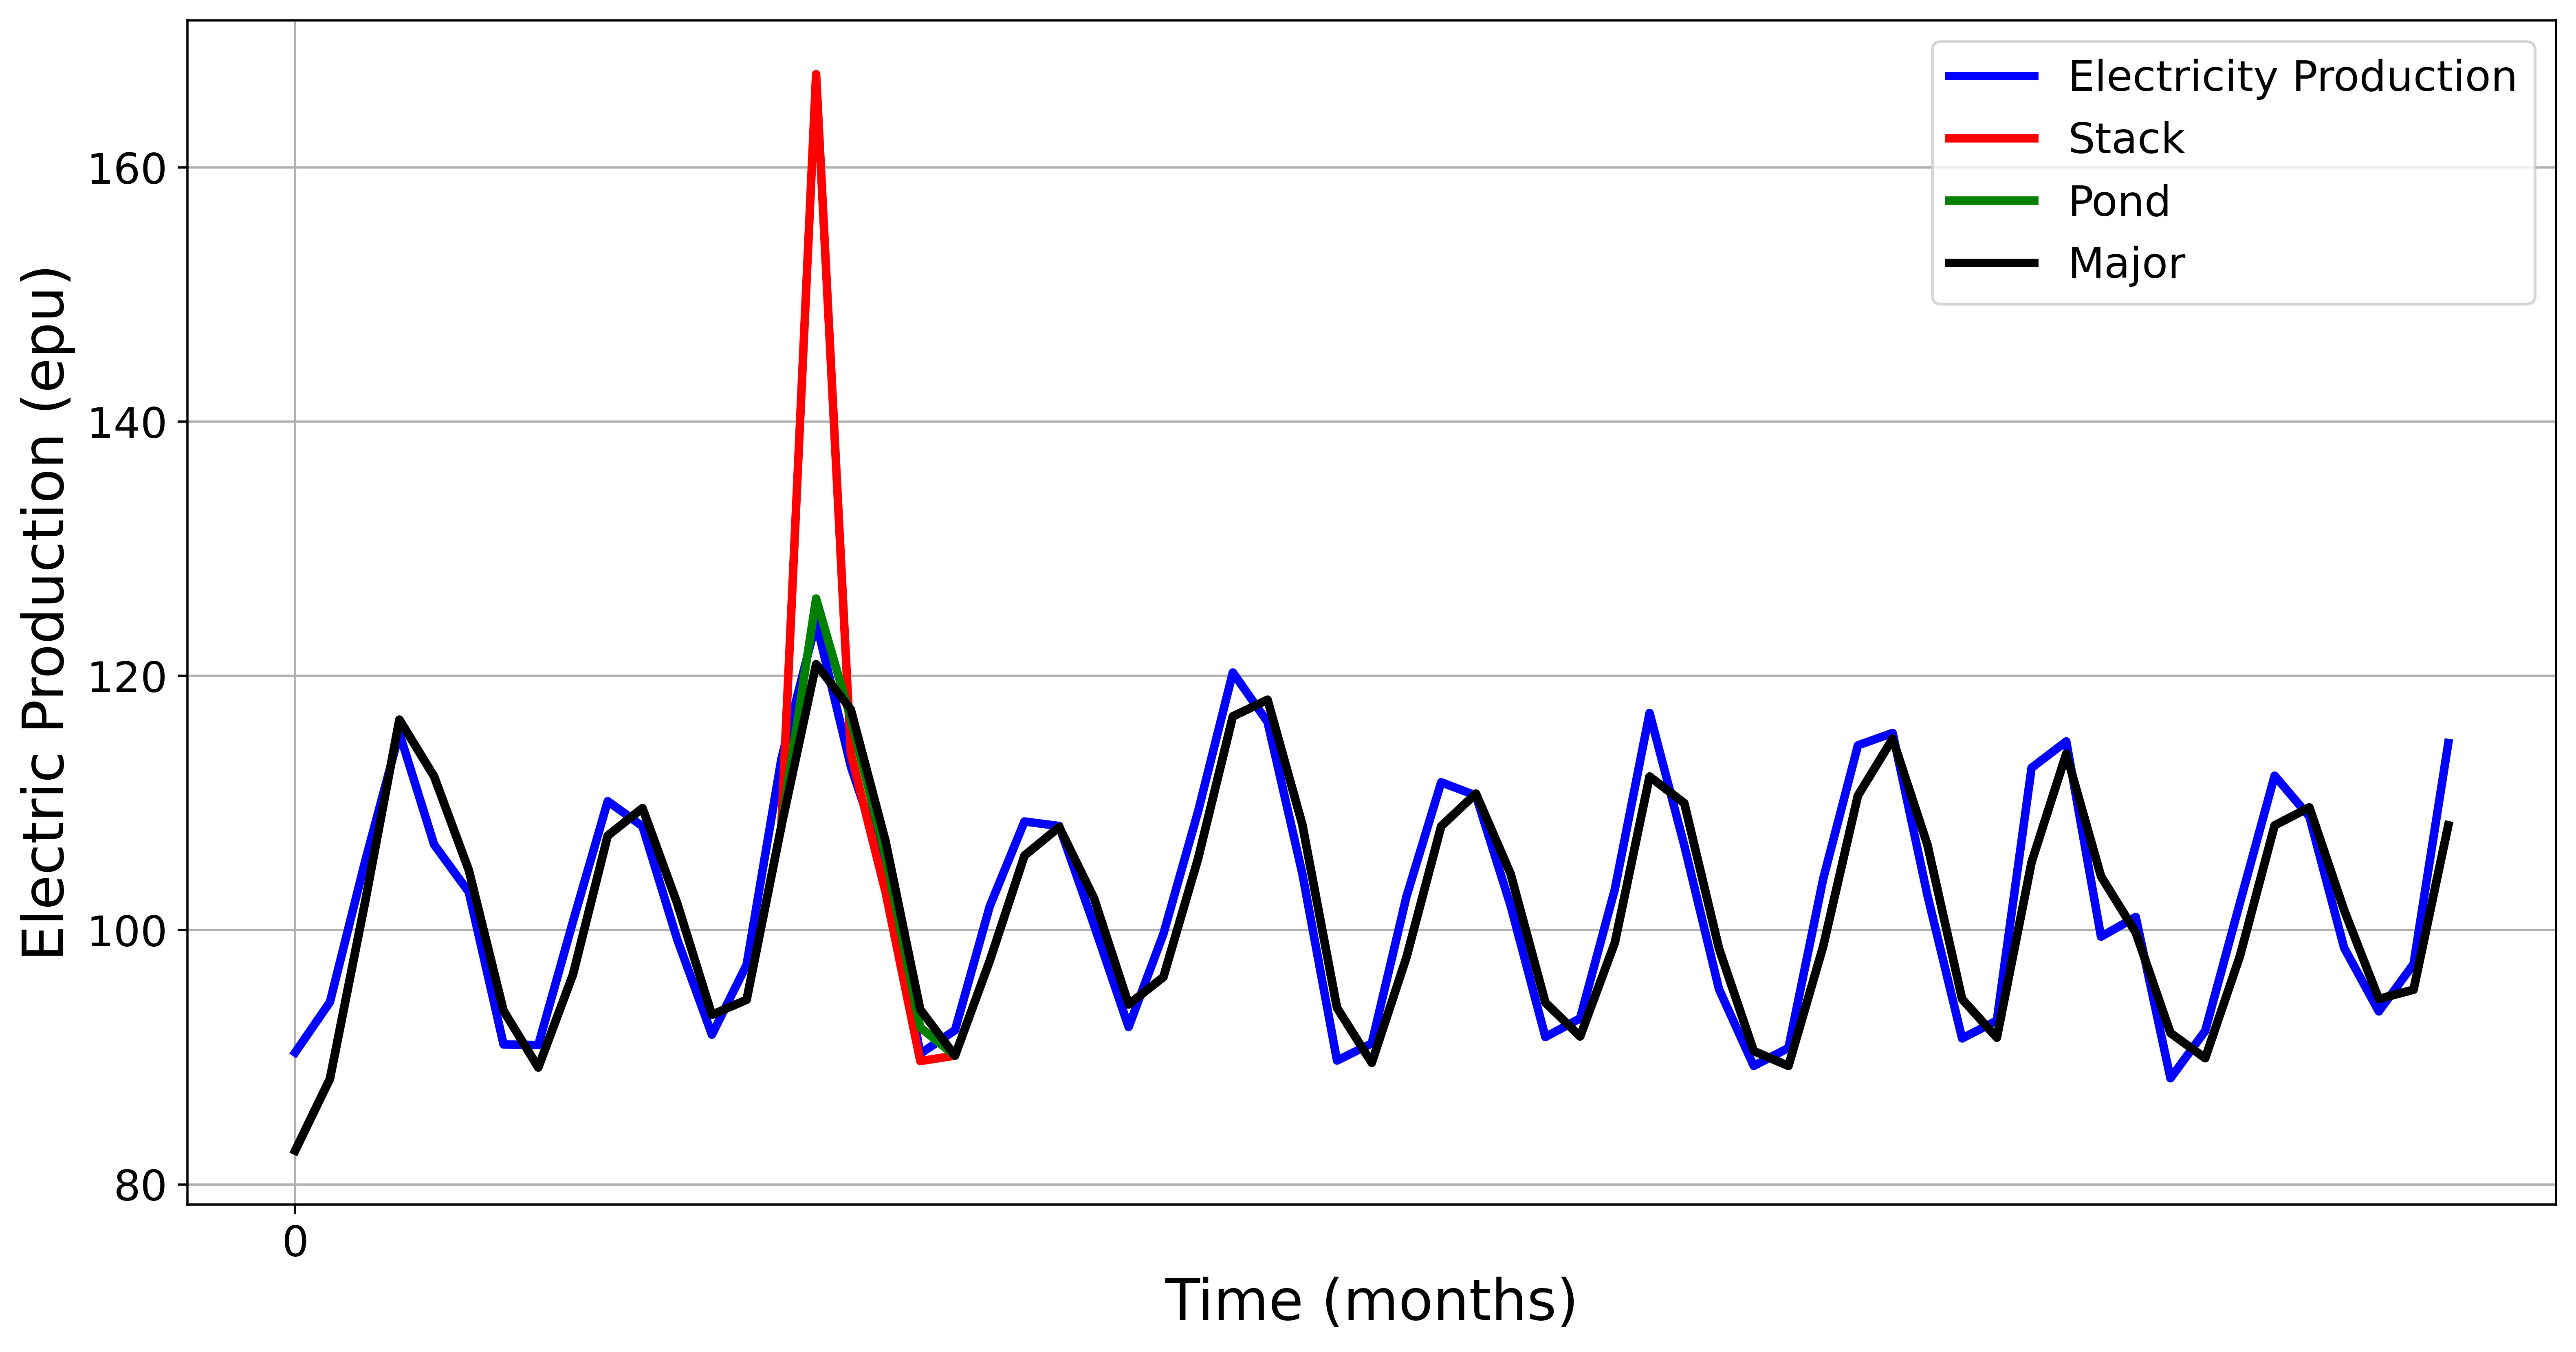

In [8]:
plt.figure(figsize=(15,7.7), dpi=200)
plt.xticks(fontsize=15)
plt.xticks(np.arange(0, len(data)+1, np.round(len(data)/5)))
plt.yticks(fontsize=15)
plt.grid()

plt.xlabel("Time (months)", fontsize=20)
plt.ylabel("Electric Production (epu)", fontsize=20)
plt.plot(y_test[1:-1], 'b', label='Electricity Production', linewidth=3)
plt.plot(TEDAEnsemble.Ypred_STACK, 'r', label='Stack', linewidth=3)
plt.plot(TEDAEnsemble.Ypred_POND, 'g', label='Pond', linewidth=3)
plt.plot(TEDAEnsemble.Ypred_MAJOR, 'k', label='Major', linewidth=3)
plt.legend(fontsize=15)

## WandB importing:

In [ ]:
#!pip install wandb

In [ ]:
os.environ["WANDB__SERVICE_WAIT"] = "1000000"

In [ ]:
!wandb login 40f0acf51f839c9bfbed5c1f24e945ed8245e110

In [ ]:
# Initialize a new W&B run to track this job
run = wandb.init(project="TEDARegressor", job_type="dataset-creation")

In [ ]:
# Create a new artifact, which is a sample dataset
dataset = wandb.Artifact('Electric_Production.csv', type='dataset')
# Add files to the artifact, in this case a simple text file
dataset.add_file('Electric_Production.csv')
# Log the artifact to save it as an output of this run
run.log_artifact(dataset)

In [ ]:
# configure logging
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s %(message)s",
                    datefmt='%d-%m-%Y %H:%M:%S')

# reference for a logging obj
logger = logging.getLogger()

### Defining dictionaries:

In [ ]:
metric_dict = {
    'name': 'rmse_TEDA_pond',
    'goal': 'minimize'   
    }

parameters_dict = {
    #TEDA Ensemble
    'Window': {
        'values': [5,6]
        },
    'Factor': {
        'values': [1]
        },
    'Threshold': {
          'values': [3]
        },
    'Init': {
      'values': ["He", "zero"]
    }, 
}

In [ ]:
parameters_dict = {
    #TEDA Ensemble
    'Window': {
        'values': [2,3,4,5,6] #5
        },
    'Factor': {
        'values': [0.5, 0.75, 0.98, 0.99, 1] #5*5 = 25
        },
    'Threshold': {
          'values': [1.5, 1.8, 2, 2.3, 3] #5*5*5 = 125
        },
    'Init': {
      'values': ["He", "Xavier", "Yoshua", "zero"] ##5*5*5*4 =  500
    }, 
}

In [ ]:
seed = 41
sweep_config = {
    "method": "grid",
    "metric": metric_dict,
    "parameters": parameters_dict,

}
sweep_id = wandb.sweep(sweep_config, project="TEDARegressor")

In [ ]:
#TEDA Regressor
RMSE_TEDA = []
RMSE_TEDA_CONS = []

#MSE Individual
RMSE_TEDA_STACK = []
RMSE_TEDA_POND = []
RMSE_TEDA_MAJOR = []  

MAE_TEDA_STACK = []
MAE_TEDA_POND = []
MAE_TEDA_MAJOR = []

In [ ]:
def train():
    with wandb.init() as run:
        #X_train, y_train, X_test, y_test = treating_dataset(name_series = df['fuel diff'], window=wandb.config.Window, N_splits = 5)
        X_train, y_train, X_test, y_test = dataSpliting(pdSeries = dataSeries, window=wandb.config.Window, N_splits = 5)
        TEDAEnsemble_ = TEDAEnsemble(m=wandb.config.Window, mu=wandb.config.Factor, threshold=wandb.config.Threshold, activation_function=wandb.config.Init)        #regressor=AutoCloud(m=window, mu=MU, threshold=THR, activation_function=I)
        
        # create codecarbon tracker
        # codecarbon is too much verbose, change the log level for more info
        tracker = EmissionsTracker(log_level="critical")
        tracker.start()        

        for t in X_test:
            #TEDAEnsemble
            TEDAEnsemble_.run(np.array(t))
        
        # get co2 emissions from tracker
        # "CO2 emission (in Kg)"
        emissions = tracker.stop()
        # energy unit is kWh
        run.summary["Energy_Consumed"] = tracker.final_emissions_data.energy_consumed
        wandb.log({"Energy_Consumed": tracker.final_emissions_data.energy_consumed})      

        
        # TEDA Ensemble
        rmse_TEDA_stack = mean_squared_error(y_test[1:-2], TEDAEnsemble.Ypred_STACK[:-1], squared=False)
        rmse_TEDA_pond = mean_squared_error(y_test[1:-2], TEDAEnsemble.Ypred_POND[:-1], squared=False)
        rmse_TEDA_major = mean_squared_error(y_test[1:-2], TEDAEnsemble.Ypred_MAJOR[:-1], squared=False)
        RMSE_TEDA_STACK.append(rmse_TEDA_stack)
        RMSE_TEDA_POND.append(rmse_TEDA_pond)
        RMSE_TEDA_MAJOR.append(rmse_TEDA_major)

        run.summary['rmse_TEDA_stack'] = rmse_TEDA_stack
        wandb.log({"rmse_TEDA_stack": rmse_TEDA_stack})

        run.summary['rmse_TEDA_pond'] = rmse_TEDA_pond
        wandb.log({"rmse_TEDA_pond": rmse_TEDA_pond})

        run.summary['rmse_TEDA_major'] = rmse_TEDA_major
        wandb.log({"rmse_TEDA_major": rmse_TEDA_major})


        mae_TEDA_stack = mean_squared_error(y_test[1:-2], TEDAEnsemble.Ypred_STACK[:-1])
        mae_TEDA_pond = mean_squared_error(y_test[1:-2], TEDAEnsemble.Ypred_POND[:-1])
        mae_TEDA_major = mean_squared_error(y_test[1:-2], TEDAEnsemble.Ypred_MAJOR[:-1])
        MAE_TEDA_STACK.append(mae_TEDA_stack)
        MAE_TEDA_POND.append(mae_TEDA_pond)
        MAE_TEDA_MAJOR.append(mae_TEDA_major)

        run.summary['mae_TEDA_stack'] = mae_TEDA_stack
        wandb.log({"mae_TEDA_stack": mae_TEDA_stack})

        run.summary['mae_TEDA_pond'] = mae_TEDA_pond
        wandb.log({"mae_TEDA_pond": mae_TEDA_pond})    

        run.summary['mae_TEDA_major'] = mae_TEDA_major
        wandb.log({"mae_TEDA_major": mae_TEDA_major})


In [ ]:
wandb.agent(sweep_id, train)

## Visualization

Here, we can visualize the Sweep Results 👀. We have use the **Parallel Coordinates Plot 🔀** to map hyperparameter values to model metrics.
We've used to see the combinations of hyperparameters that led to the **best model performance 📊**:


#### Sweep Data
![Sweep](results/TEDAEnsemble.png)

#### Now, we are going to look the model results:

In [9]:
df_tedaensemble_sweep = pd.read_csv("results/TEDAEnsemble.csv")
df_tedaensemble_sweep.head()

,Name,Window,Factor,Threshold,Init,rmse_TEDA_pond,rmse_TEDA_stack,rmse_TEDA_major,mae_TEDA_pond,mae_TEDA_stack,mae_TEDA_major,Energy_Consumed
0,lemon-sweep-386,2,0.99,2.0,zero,5.143705,9.550864,5.011179,26.457705,91.219000,25.111914,3.094961e-08
1,visionary-sweep-141,2,0.75,2.3,Xavier,3.766063,3.766063,3.766063,14.183231,14.183231,14.183231,3.252950e-08
2,pleasant-sweep-131,2,0.75,1.8,Xavier,3.770247,4.659151,3.795357,14.214761,21.707690,14.404733,3.015506e-08
3,super-sweep-441,2,1.00,2.3,Xavier,3.869617,3.869617,3.869617,14.973933,14.973933,14.973933,3.992518e-08
4,giddy-sweep-156,2,0.75,1.8,Yoshua,3.915816,3.785259,3.971238,15.333612,14.328182,15.770730,2.777038e-08


### RMSE

In [10]:
MIN = [min(df_tedaensemble_sweep['rmse_TEDA_major']), min(df_tedaensemble_sweep['rmse_TEDA_stack']), min(df_tedaensemble_sweep['rmse_TEDA_pond'])]
MIN

[3.369511350698125, 3.38188833389082, 3.326149580679726]

### Best hyperparameter setup:

In [11]:
df_tedaensemble_sweep[df_tedaensemble_sweep['rmse_TEDA_pond']==min(df_tedaensemble_sweep['rmse_TEDA_pond'])]

,Name,Window,Factor,Threshold,Init,rmse_TEDA_pond,rmse_TEDA_stack,rmse_TEDA_major,mae_TEDA_pond,mae_TEDA_stack,mae_TEDA_major,Energy_Consumed
45,snowy-sweep-211,2,0.98,2.0,He,3.32615,6.383607,3.384876,11.063271,40.750442,11.457384,2.933389e-08


In [12]:
MAX = [max(df_tedaensemble_sweep['rmse_TEDA_major']), max(df_tedaensemble_sweep['rmse_TEDA_stack']), max(df_tedaensemble_sweep['rmse_TEDA_pond'])]
MAX

[11.581226700176568, 16.716013620912655, 11.732573263975477]

In [13]:
MEAN = [np.mean(df_tedaensemble_sweep['rmse_TEDA_major']), np.mean(df_tedaensemble_sweep['rmse_TEDA_stack']), np.mean(df_tedaensemble_sweep['rmse_TEDA_pond'])]
MEAN

[7.743462139668222, 8.422834865700578, 7.741625602321835]

### MAE

In [14]:
MIN_mae = [min(df_tedaensemble_sweep['mae_TEDA_major']), min(df_tedaensemble_sweep['mae_TEDA_stack']), min(df_tedaensemble_sweep['mae_TEDA_pond'])]
MIN_mae

[11.353606742483503, 11.437168702906826, 11.06327103305592]

In [15]:
MEAN_mae = [np.mean(df_tedaensemble_sweep['mae_TEDA_major']), np.mean(df_tedaensemble_sweep['mae_TEDA_stack']), np.mean(df_tedaensemble_sweep['mae_TEDA_pond'])]
MEAN_mae

[64.96306145801849, 77.76059214332473, 64.96544534532872]

In [16]:
MAX_mae = [max(df_tedaensemble_sweep['mae_TEDA_major']), max(df_tedaensemble_sweep['mae_TEDA_stack']), max(df_tedaensemble_sweep['mae_TEDA_pond'])]
MAX_mae

[134.12481188088262, 279.4251113745374, 137.65327539455217]

### Energy

In [17]:
min(df_tedaensemble_sweep['Energy_Consumed'])

0.0

In [18]:
np.mean(df_tedaensemble_sweep['Energy_Consumed'])

3.3609557384518715e-08

In [19]:
max(df_tedaensemble_sweep['Energy_Consumed'])

1.9230085294856918e-07

In [20]:
label = ['Major', 'Stack', 'Pondering']

In [21]:
df_tedaensemble_results = pd.DataFrame(data={"label": label,"Mininum": MIN, "Mean": MEAN, "Maximum": MAX})
df_tedaensemble_results.head()

,label,Mininum,Mean,Maximum
0,Major,3.369511,7.743462,11.581227
1,Stack,3.381888,8.422835,16.716014
2,Pondering,3.326150,7.741626,11.732573


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0')])

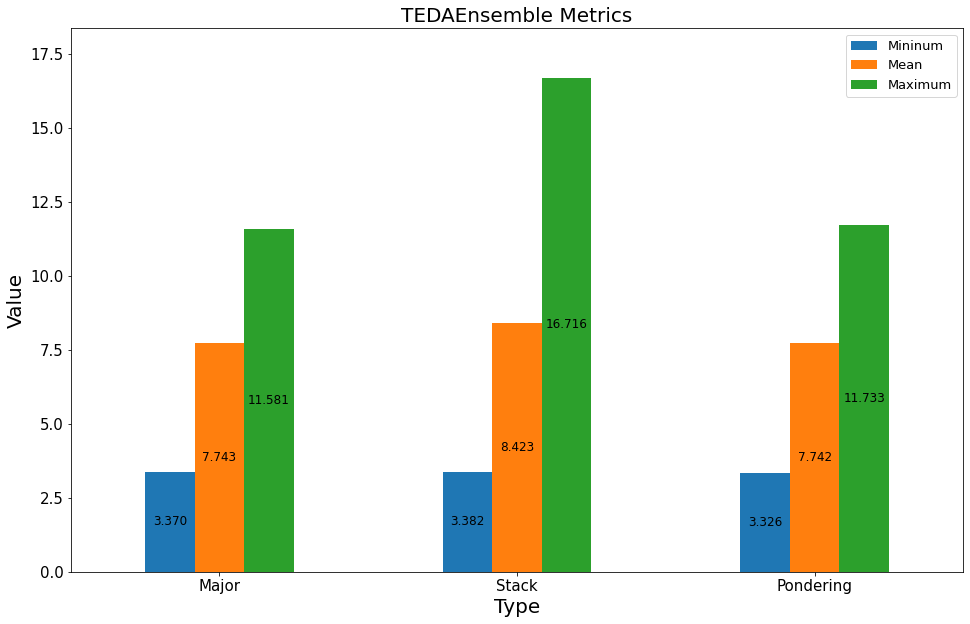

In [23]:
# plot bars or kind='barh' for horizontal bars; adjust figsize accordingly
ax = df_tedaensemble_results.plot(kind='bar', rot=0, xlabel='Threshold', ylabel='Recall', figsize=(16, 10))

X_axis = np.arange(len(label))

# add some labels
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%.3f', label_type='center',fontsize=12)
    
# add a little space at the top of the plot for the annotation
ax.margins(y=0.1)

plt.xticks(X_axis, label) 

# move the legend out of the plot
ax.legend(fontsize=13)

plt.title("TEDAEnsemble Metrics", fontsize=20)
plt.xlabel("Type", fontsize=20)
plt.ylabel("Value", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.show()

#plt.savefig("results_eletric_TEDA_metrics.eps", dpi=600, bbox_inches='tight')
#plt.savefig('', format='png', bbox_inches='tight')